# Linear regression

Prediction of weight of fish based on its weight, height, length.

This is a good application of linear regression since the dependent variable changes linearly based on the independent variables

## What is linear regression?

Assuming we have n points plotted on a graph, this model tries to find the slope (m) and y-intercept (b) of a straight line which is as close as possible to all the points(the mean distance between the points and the line is as low as possible).

## How does the computer find the best value for m and b?

The best value for m and b can be found using this formula: [Formula](https://imgur.com/a/4wmi1a1)

## What does this notebook contain?

Graphical representation of 4 models where each of them have 2 parts:
- Created by the computer
- Created by mathematically finding m and b

The predictions of both the parts for each of the 4 models will be drawn on a graph to show that they are the same since they will overlap eachother.

In [76]:
import pandas as pd

df = pd.read_csv("Fish.csv")

In [77]:
df.drop(df[df["Weight"] == 0].index, inplace=True)
df["Length"] = (df["Length1"] + df["Length2"] + df["Length3"]) / 3
df.drop(["Length1", "Length2", "Length3"], axis=1,inplace=True)

df.head()

,Species,Weight,Height,Width,Length
0,Bream,242.0,11.5200,4.0200,26.200000
1,Bream,290.0,12.4800,4.3056,27.166667
2,Bream,340.0,12.3778,4.6961,27.166667
3,Bream,363.0,12.7300,4.4555,29.600000
4,Bream,430.0,12.4440,5.1340,29.833333


Splitting the attributes to use them seperately

In [78]:
x1 = df["Length"]
x2 = df["Height"]
x3 = df["Width"]

y = df["Weight"]

In [79]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams["figure.figsize"] = (20,10)

## Length

In [80]:
x1 = pd.DataFrame(x1)

m1 = LinearRegression()
m1.fit(x1, y)

print(f"""
Slope: {m1.coef_}
y intercept: {m1.intercept_}""")

p1 = m1.predict(x1)


Slope: [30.57609909]
y intercept: -476.0673127029776


In [81]:
df1 = df.copy()

df1 = df1[["Weight", "Length"]]
df1.rename(columns={'Weight': 'Weight (y)', 'Length': 'Length (x)'}, inplace=True)
df1["xy"] = df1["Weight (y)"] * df1["Length (x)"]
df1["x**2"] = df1["Length (x)"] * df1["Length (x)"]

df1.head()

,Weight (y),Length (x),xy,x**2
0,242.0,26.200000,6340.400000,686.440000
1,290.0,27.166667,7878.333333,738.027778
2,340.0,27.166667,9236.666667,738.027778
3,363.0,29.600000,10744.800000,876.160000
4,430.0,29.833333,12828.333333,890.027778


In [82]:
n = len(df1["Weight (y)"])

m = ((n * sum(df1["xy"])) - (sum(df1["Length (x)"]) * sum(df1["Weight (y)"]))) / ((n * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["Length (x)"])))

b = ((sum(df1["Weight (y)"]) * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["xy"]))) / ((n * sum(df1["x**2"])) - (sum(df1["Length (x)"]) * sum(df1["Length (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 30.576099087935674
y intercept: -476.06731270298576


In [83]:
df1["y_plots"] = (df1["Length (x)"] * m) + b

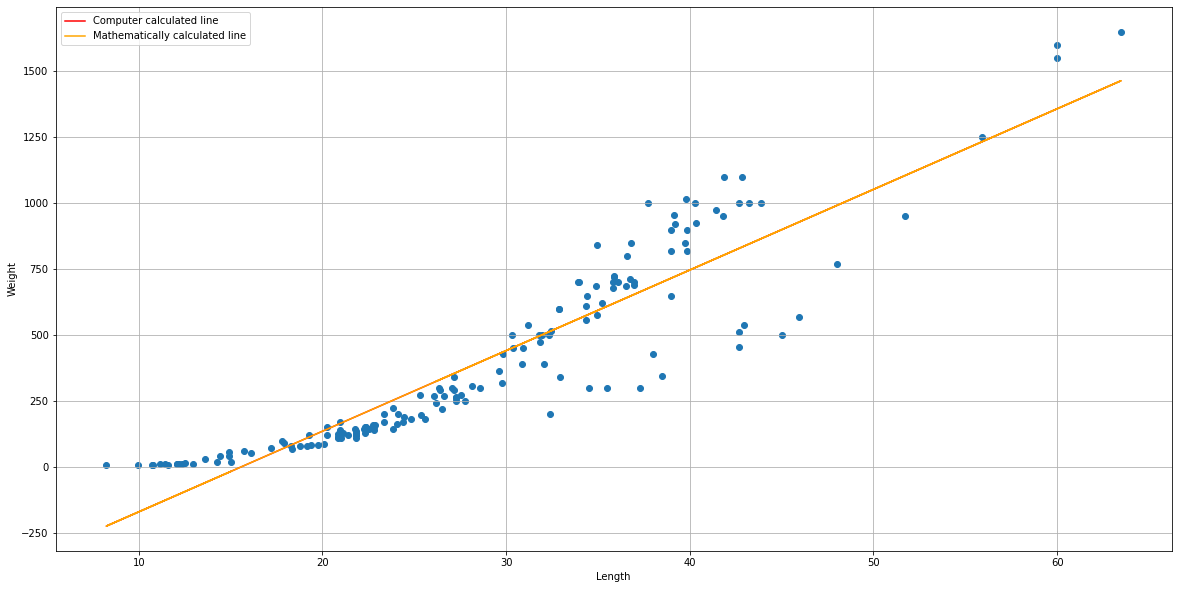

In [84]:
plt.scatter(x1, y)
plt.plot(x1, p1, color="red", label="Computer calculated line")
plt.plot(df1["Length (x)"], df1["y_plots"] , color="orange", label="Mathematically calculated line")

plt.xlabel("Length")
plt.ylabel("Weight")

plt.legend(loc="upper left")
plt.grid()

plt.show()

## Height

In [85]:
x2 = pd.DataFrame(x2)

m2 = LinearRegression()
m2.fit(x2, y)

print(f"""
Slope: {m2.coef_}
y intercept: {m2.intercept_}""")

p2 = m2.predict(x2)


Slope: [60.28187533]
y intercept: -140.89307841499806


In [86]:
df2 = df.copy()

df2 = df2[["Weight", "Height"]]
df2.rename(columns={'Weight': 'Weight (y)', 'Height': 'Height (x)'}, inplace=True)
df2["xy"] = df2["Weight (y)"] * df2["Height (x)"]
df2["x**2"] = df2["Height (x)"] * df2["Height (x)"]

df2.head()

,Weight (y),Height (x),xy,x**2
0,242.0,11.5200,2787.840,132.710400
1,290.0,12.4800,3619.200,155.750400
2,340.0,12.3778,4208.452,153.209933
3,363.0,12.7300,4620.990,162.052900
4,430.0,12.4440,5350.920,154.853136


In [87]:
n = len(df2["Weight (y)"])

m = ((n * sum(df2["xy"])) - (sum(df2["Height (x)"]) * sum(df2["Weight (y)"]))) / ((n * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["Height (x)"])))

b = ((sum(df2["Weight (y)"]) * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["xy"]))) / ((n * sum(df2["x**2"])) - (sum(df2["Height (x)"]) * sum(df2["Height (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 60.28187533035098
y intercept: -140.89307841499726


In [88]:
df2["y_plots"] = (df2["Height (x)"] * m) + b

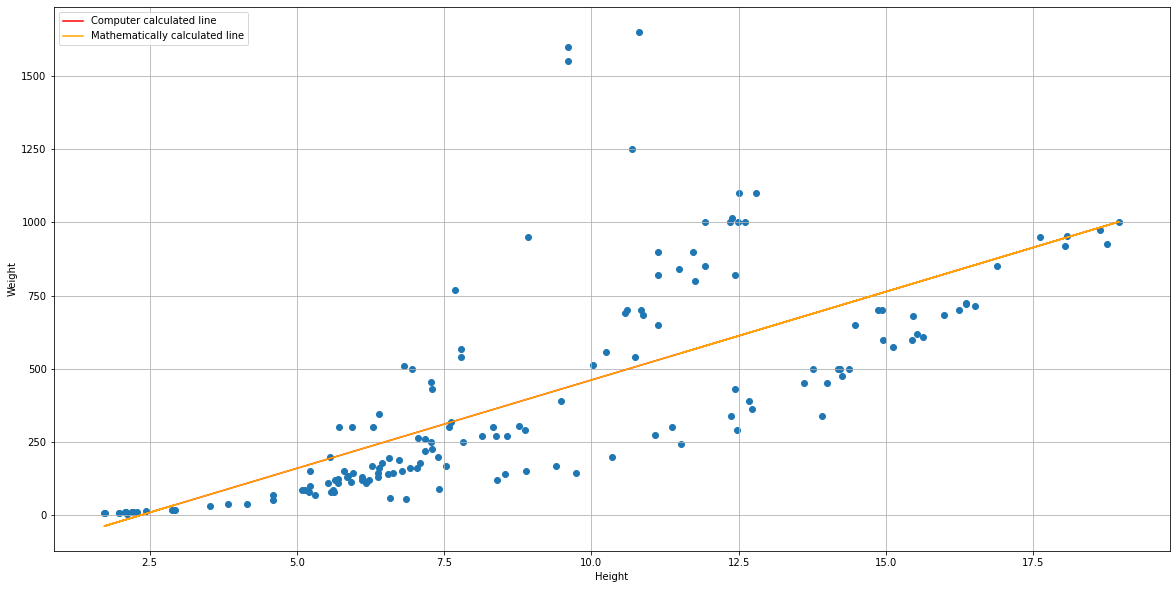

In [89]:
plt.scatter(x2, y)
plt.plot(x2, p2, color="red", label="Computer calculated line")
plt.plot(df2["Height (x)"], df2["y_plots"] , color="orange", label="Mathematically calculated line")

plt.xlabel("Height")
plt.ylabel("Weight")

plt.legend(loc="upper left")
plt.grid()

plt.show()

## Width

In [90]:
x3 = pd.DataFrame(x3)

m3 = LinearRegression()
m3.fit(x3, y)

print(f"""
Slope: {m3.coef_}
y intercept: {m3.intercept_}""")

p3 = m3.predict(x3)


Slope: [187.77514373]
y intercept: -429.9132647792899


In [91]:
df3 = df.copy()

df3 = df3[["Weight", "Width"]]
df3.rename(columns={'Weight': 'Weight (y)', 'Width': 'Width (x)'}, inplace=True)
df3["xy"] = df3["Weight (y)"] * df3["Width (x)"]
df3["x**2"] = df3["Width (x)"] * df3["Width (x)"]

df3.head()

,Weight (y),Width (x),xy,x**2
0,242.0,4.0200,972.8400,16.160400
1,290.0,4.3056,1248.6240,18.538191
2,340.0,4.6961,1596.6740,22.053355
3,363.0,4.4555,1617.3465,19.851480
4,430.0,5.1340,2207.6200,26.357956


In [92]:
n = len(df3["Weight (y)"])

m = ((n * sum(df3["xy"])) - (sum(df3["Width (x)"]) * sum(df3["Weight (y)"]))) / ((n * sum(df3["x**2"])) - (sum(df3["Width (x)"]) * sum(df3["Width (x)"])))

b = ((sum(df3["Weight (y)"]) * sum(df3["x**2"])) - (sum(df3["Width (x)"]) * sum(df3["xy"]))) / ((n * sum(df3["x**2"])) - (sum(df3["Width (x)"]) * sum(df3["Width (x)"])))

print(f"""
Slope: {m}
y intercept: {b}""")


Slope: 187.7751437282082
y intercept: -429.9132647792923


In [93]:
df2["y_plots"] = (df2["Height (x)"] * m) + b

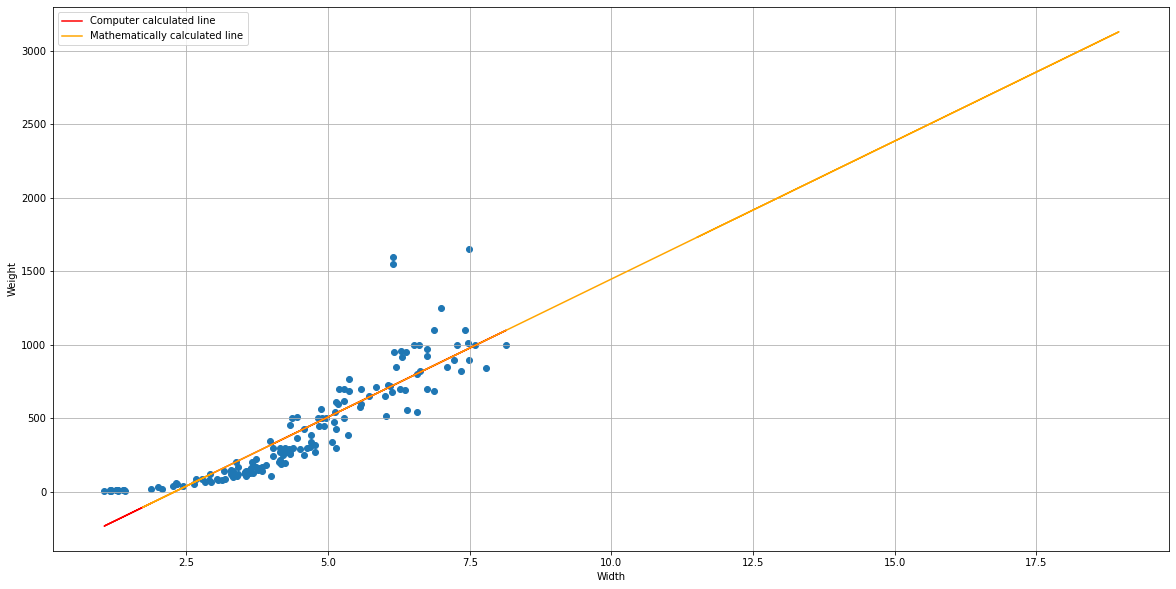

In [94]:
plt.scatter(x3, y)
plt.plot(x3, p3, color="red", label="Computer calculated line")
plt.plot(df2["Height (x)"], df2["y_plots"] , color="orange", label="Mathematically calculated line")

plt.xlabel("Width")
plt.ylabel("Weight")

plt.legend(loc="upper left")
plt.grid()

plt.show()

## Bringing them all together

In [95]:
x = df[["Length", "Height", "Width"]]

m = LinearRegression()
m.fit(x, y)

print(f"""
Slope: {m.coef_}
y intercept: {m.intercept_}""")

p = m.predict(x)


Slope: [21.08804439  9.63410991 50.75310554]
y intercept: -515.0755230993047


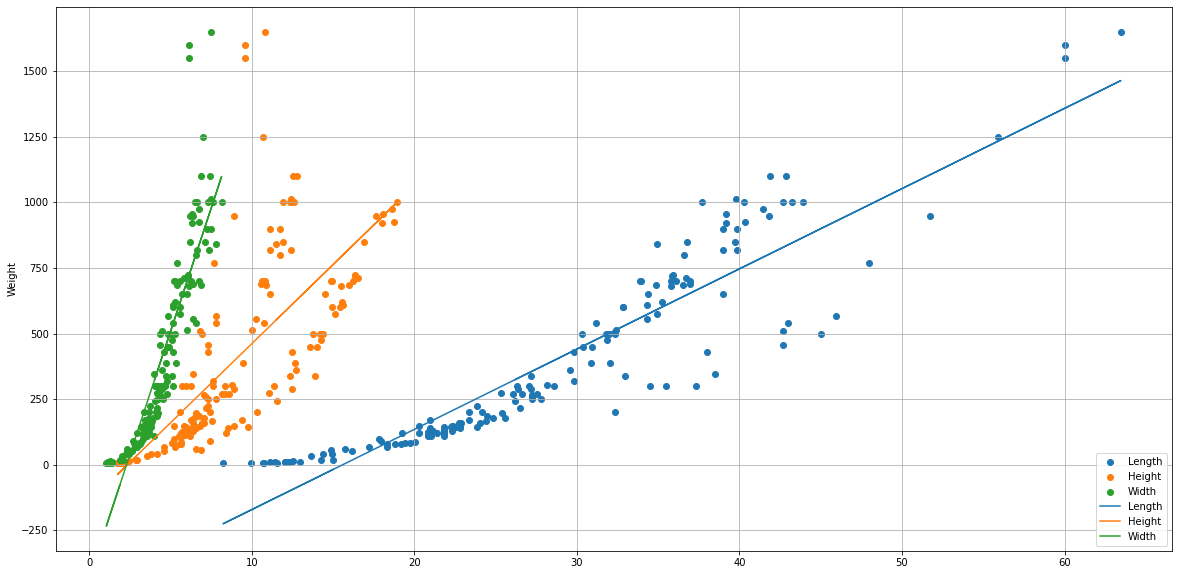

In [96]:
plt.scatter(x1, y, label="Length")
plt.scatter(x2, y, label="Height")
plt.scatter(x3, y, label="Width")

plt.plot(x1, p1, label="Length")
plt.plot(x2, p2, label="Height")
plt.plot(x3, p3, label="Width")

plt.grid()
plt.ylabel("Weight")
plt.legend(loc="lower right")

plt.show()